# How are in-demand skills trending for Data Analysts over time?
### Methodology
1. Aggregate skill counts monthly
2. Perform Analysis based on percentage of total job postings
3. Plot the monthly skill demand

In [1]:
# Importing libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # convert skill_list from str to list

In [2]:
# only interested in Data Analysts in the UK, so filter accordingly
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [3]:
# aggregate on a monthly basis, create a new column in the data to show the month that the job was posted
df_da_uk['job_posted_month_no'] = df_da_uk['job_posted_date'].dt.month

In [4]:
# explode the data frame on the 'job_skills' column, so that each skill is its own row
df_da_uk_explode = df_da_uk.explode('job_skills')

In [17]:
# convert into a pivot table, using size as we are performing a count of all the skills, fill=0 to set unmentioned skills to a count of zero
df_da_uk_pivot = df_da_uk_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# create a new row 'Total' to find the sum of all jobs, in order to calculate percentage later
df_da_uk_pivot.loc['Total'] = df_da_uk_pivot.sum()

# sort the data frame by total
df_da_uk_pivot = df_da_uk_pivot[df_da_uk_pivot.loc['Total'].sort_values(ascending=False).index]

# drop the 'Total' row as it is no longer needed
df_da_uk_pivot = df_da_uk_pivot.drop('Total')

In [18]:
# find the size of each posting by month
da_totals = df_da_uk.groupby('job_posted_month_no').size()

In [19]:
# convert the data frame to percentages, using the .div() method
df_da_uk_percent = df_da_uk_pivot.div(da_totals/100, axis=0)

In [20]:
# convert month number to month name
df_da_uk_percent = df_da_uk_percent.reset_index()
df_da_uk_percent['job_posted_month'] = df_da_uk_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_uk_percent = df_da_uk_percent.set_index('job_posted_month')
df_da_uk_percent = df_da_uk_percent.drop(columns='job_posted_month_no')

df_da_uk_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,selenium,flutter,fortran,redis,golang,ionic,kotlin,laravel,node,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,41.376960,39.604635,25.289707,18.132243,13.905930,9.611452,8.588957,4.976142,3.680982,5.316973,...,0.000000,0.068166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068166,0.000000
Feb,42.816365,45.575642,27.307326,17.031399,16.270219,8.658421,8.753568,6.184586,4.376784,4.281637,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,42.275281,41.994382,24.438202,16.853933,16.432584,9.410112,7.303371,5.337079,5.898876,6.039326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,40.998217,40.463458,28.520499,16.042781,13.368984,8.377897,6.773619,5.704100,4.812834,6.951872,...,0.000000,0.000000,0.000000,0.178253,0.000000,0.178253,0.000000,0.000000,0.000000,0.000000
May,42.019544,40.553746,26.221498,15.635179,12.377850,8.631922,6.514658,5.863192,4.723127,4.397394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,38.315217,40.353261,24.592391,16.032609,12.907609,7.065217,4.891304,4.891304,5.027174,4.619565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,44.618834,44.170404,33.295964,22.645740,11.883408,10.874439,8.744395,12.443946,5.044843,9.417040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,42.622951,42.950820,28.032787,17.868852,13.770492,8.360656,5.901639,6.885246,6.393443,4.590164,...,0.000000,0.000000,0.163934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,44.784173,40.557554,28.597122,22.931655,18.525180,12.949640,7.374101,6.294964,5.485612,4.316547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089928,0.089928,0.000000,0.000000


## Plotting

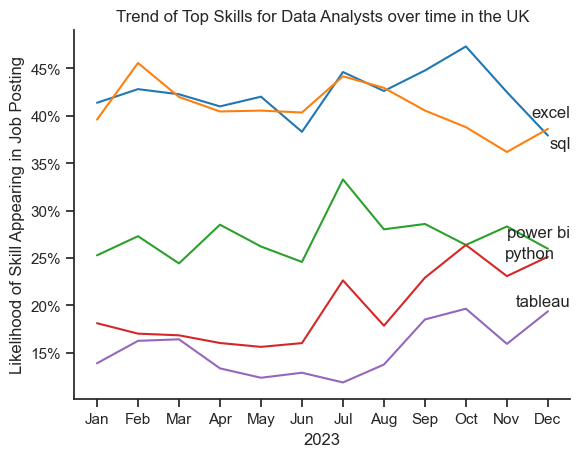

In [37]:
# slice the first desired amount of values, so we have a data frame of the top mentioned skills by percentage
desired_value_no = 5
df_plot = df_da_uk_percent.iloc[:, :desired_value_no]

#plot using Seaborn
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style="ticks")
sns.despine()

plt.title('Trend of Top Skills for Data Analysts over time in the UK')
plt.ylabel('Likelihood of Skill Appearing in Job Posting')
plt.xlabel('2023') # data is from 2023
plt.legend().remove() # remove the legend as it is not needed, lines are labelled

# want to change y-axis to show percentage, simplest via matplotlib PercentageFormatter, so import in and use
from matplotlib.ticker import PercentFormatter
ax = plt.gca() # get the current axis
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0)) # set the current axis


# ran into some issues with overlapping labels, most effective way to resolve seemed to be with adjustText
from adjustText import adjust_text
texts = []
for i in range(desired_value_no):
    text = plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) 
    texts.append(text) # loop through i amount of skills, place at last index, i, display text as column name for i index, add to list

# adjust text to avoid overlap
adjust_text(texts) # uses 'texts' list to appropriate place text on each line

plt.show()